# 회귀

## 정의

- 자연현상, 사회현상등에서 **변수(피처)들 사이에서의 관계를 모델링**하는 방법
- 예시
    - 과외 시간이 시험 성적에 미치는 영향
    - 헬스등 운동이 건강에 미치는 영향
- 구성
    - 독립변수 : 영향을 미치는 주는 변수
    - 종속변수 : 영향을 받는 변수
- 독립변수와 종속변수 간의 관계를 모델링하는 방법
- 회귀 분석은 데이터값이 평균등 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 데이터 관점
    - 종속변수가 수치형 데이터(주로 연속형)

## 종류

- 독립변수의 개수
    - 단순 선형 회귀
        - 독립변수 1, 종속변수 1
        - y = w0 + w1X
    - 다중 선형 회귀
        - 독립변수 n개, 종속변수 1개
        - y = w0 + w1X1 + w2X2 + ... + + wnXn
    - W
        - 회귀계수
        - 이식을 만족(오차최소)하는 최적의 회귀계수를 찾는 과정 -> 학습
- 회귀 계수를 결합
    - 선형    (직선형,대각선형)
    - 비선형  (곡선형, n차함수)
- 목표
    - 독립변수와 종속변수 사이의 관계를 정의하는 최적의 회귀계수를 학습을 통해서 찾는 과정

# 알고리즘 주요 체크

- 규제
    - 회귀 모델의 과적합을 방지하기 위함
    - L1
        - Lasso 알고리즘
        - W 절대값에 패널티 부여
        - 영향력이 적은 회귀계수의 값을 0으로 만들어서 제거시킴 => 피처수 줄어든다 => 과적합 방지
    - L2
        - Ridge 알고리즘
        - W제곱에 패널피 부여
        - 회귀계수 값을 작게 만든다 -> 영향력이 떨어짐 -> 과적합 방지
    - L1, L2
        - ElasticNet 알고리즘        
        - 모두 적용
    - 파라미터명
        - alpha 비용함수를 통해서 패널피 부여

- 일반 선형 회귀
    - RSS(Residual Sum of Squares)
        - 예측값과 실제값 사이의 차이를 연산을 통해서 계산
        - 오차값을 제곱해서 더한다
        - 이런 지표들을 이용하여 회귀계수를 최적화 하는데 사용함
    - 기타 다양한 평가지표 존재

In [ ]:
from IPython.display import Image

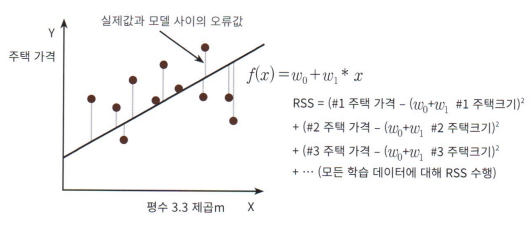

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/img/ml_RSS계산.png')

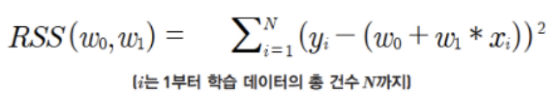

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/img/ml_RSS계산식.png')
# RSS : 비용함수, W : 회귀계수
# 알고리즘은 학습을 통해서 RSS(비용값)이 최소가 되게 회귀계수를 조정

# 알고리즘

- 단순선형회귀
    - 기본 모델, 베이스라인
- 릿지
    - L2규제, 잘 사용하지 않음
- 라쏘
    - L1규제, 잘 사용하지 않음
- Elastic Net
    - L1, L2 규제, 잘 사용하지 않음
    - 피처가 많으면 그래도 사용해볼만함
- Logistic Regression
    - 이진분류에서 더 많이 사용
    - 베이스라인 검토
- 앙상블
    - 회귀에서 최종 모델로 선정 가능성이 가장 크다
    - 보팅, 부스팅 계열

# 평가지표 - 손실함수

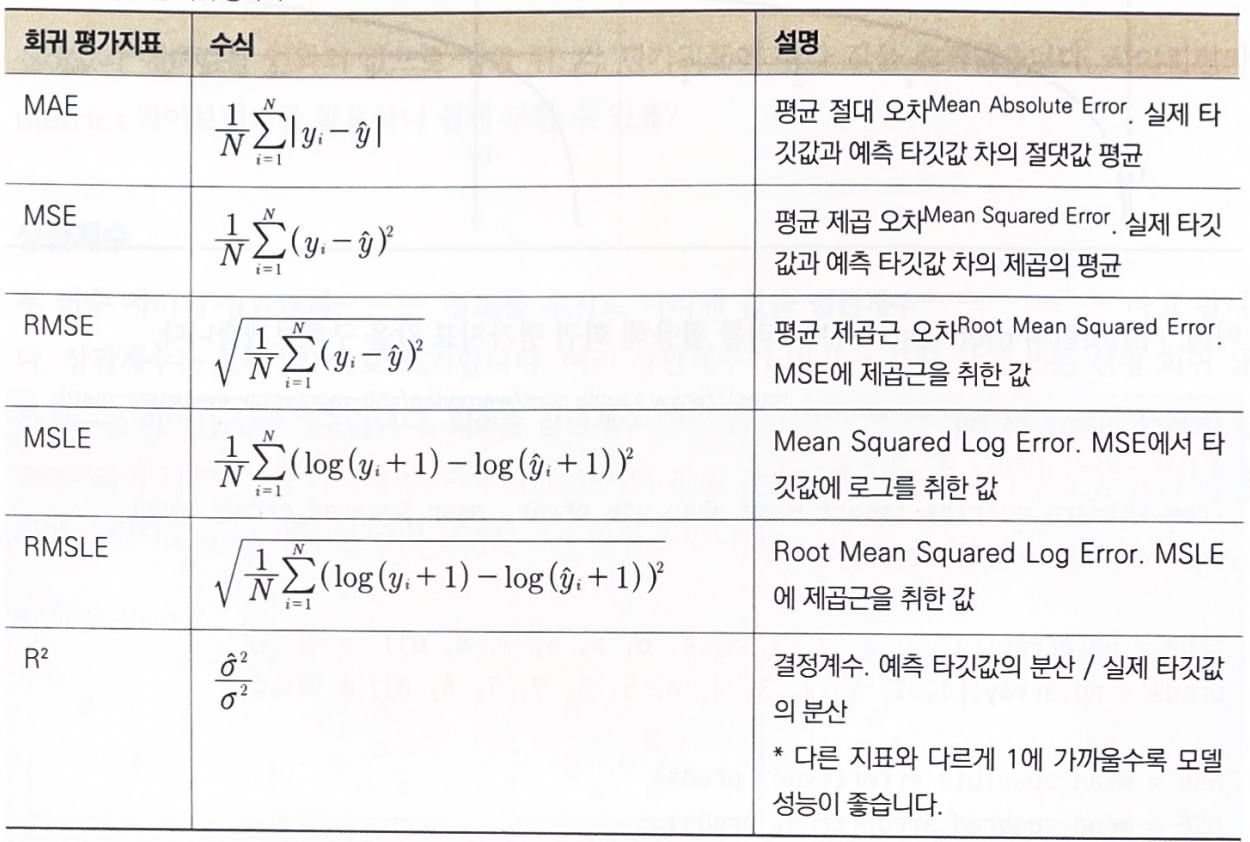

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/img/ml_회귀평가지표.png')

# MAE, MSE, MSLE는 함수로 제공(API)
# RMSE, RMSLE는 직접 구현 넘파이 함수를 혼용해서 사용한다.
# 컴페티션같은 대회에서는 평가지표를 제시함. -> 이에 맞게 전략을 수립한다
# R^2 1에 가까워야 성능이 좋다 -> 분산에 대한 지표
# 손실함수들은 0에 가까워야 성능이 좋다!
# log가 들어가는 평가지표 적용 데이터들은 타겟값에 로그 적용 확률이 높다 => 분포가 한쪽으로 몰릴 가능성이 크다는 뜻

- R^2 = 1 - (오차^2/편차^2)
- R^2 = 1 - ((실제값 - 예측값)^2)/((실제값-평균값)^2)

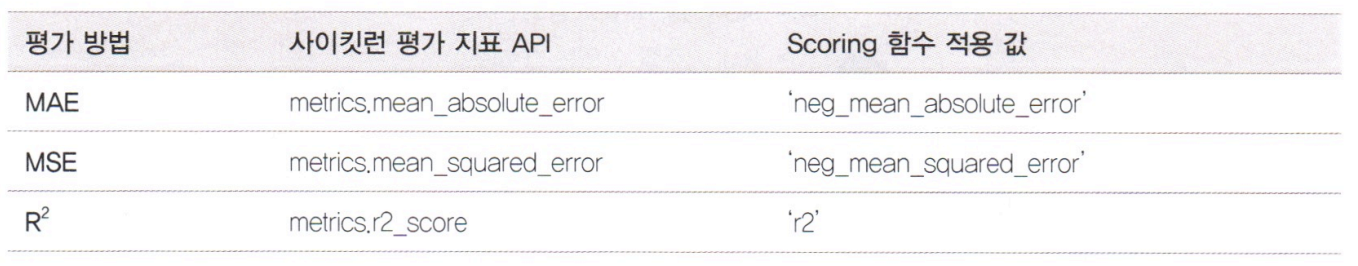

In [ ]:
Image('/content/drive/MyDrive/ASAC/Python 머신러닝/img/ml_cv_회귀_스코어링.png')
# sklearn.metrics 하위에 함수들을 제공한다

In [ ]:
# 평가함수 테스트
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score, mean_squared_log_error

# 데이터 준비
y_true = np.arange(16)
y_pred = np.arange(16)
np.random.shuffle(y_pred)
y_true, y_pred

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([ 8,  3,  2,  6, 11,  5,  7, 15, 13,  0, 10,  4, 14,  1,  9, 12]))

In [ ]:
def show_reg_metrics(true, pred) :
    print('mae', mean_absolute_error(true, pred))
    print('mse', mean_squared_error(true, pred))
    print('rmse', np.sqrt(mean_squared_error(true, pred))) # RMSE
    print('msle', mean_squared_log_error(true,pred))
    print('rmsle', np.sqrt(mean_squared_log_error(true,pred)))
    print('r2', r2_score(true,pred))

show_reg_metrics(y_true, y_pred)
# 평가지표는 0에 가까울수록 좋은 모델이라고 본다
# R square는 1에 가까울수록 좋음,

# 스코어링 => 교차검증시 평가 기준값 => neg_키워드 추가
# 분류(정확도)는 값이 커지면 좋은것, 회귀(손실값)는 값이 작을수록 좋은것
# 회귀상의 교ㅏ검증시 값이 커지면 좋다고 인식하는 문제 => 보정 => 음수처리를 한다

mae 4.5
mse 33.0
rmse 5.744562646538029
msle 1.0727667415617699
rmsle 1.0357445348935084
r2 -0.5529411764705883


# 간단한 회귀 베이스라인
- 보스턴 집값 가격 예측 데이터
    - 집값(타겟) => 연속형

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [ ]:
house = fetch_california_housing()
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
house.feature_names, house.target_names

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [ ]:
house.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## 피처별 데이터 분포

In [ ]:
house_df = pd.DataFrame(house.data, columns = house.feature_names)
house_df['MedHouseVal'] = house.target
house_df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


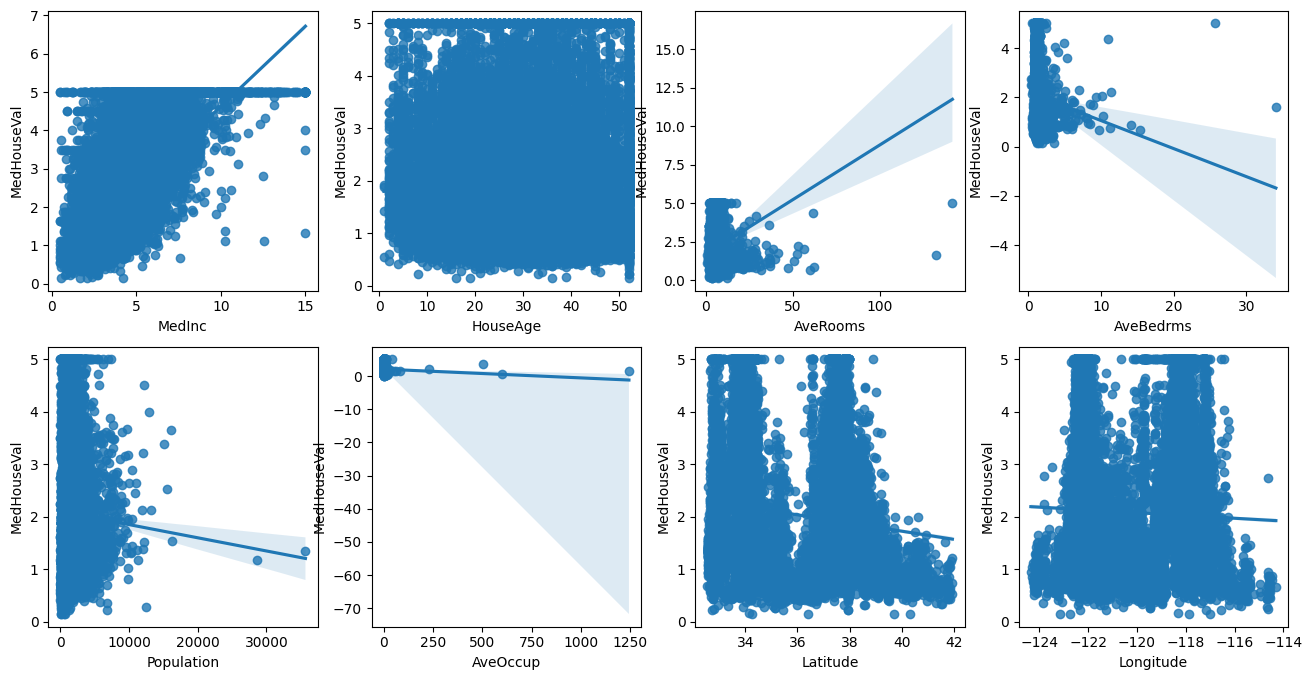

In [ ]:
fig, ax = plt.subplots( figsize=(16, 8), ncols=4, nrows=2 )
feats   = house.feature_names

for idx, feat in enumerate(feats):
    #print( idx, feat )
    # 회귀선을 그리는 차트
    sns.regplot( x=feat, y='MedHouseVal', data=house_df,
                 ax=ax[ int(idx/4) ][ idx % 4 ] )

'''
'MedInc', -> 양의 상관관계가 보임
'HouseAge', -> 성향이 잘 않보임, 골고루 분포되어 있음
'AveRooms', -> 양의 상관관계가 보임
'AveBedrms', -> 음의 상관관계가 보임
'Population',-> 음의 상관관계가 보임
'AveOccup',-> 음의 상관관계가 보임
'Latitude',-> 음의 상관관계가 보임(아주 약하게보임) -> 이웃값, 군집도 필요해 보임
'Longitude'-> 음의 상관관계가 보임(아주 약하게보임)
'''
plt.show()

## 베이스라인모델

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 데이터 준비
X = house_df.drop(['MedHouseVal'], axis = 1)
y = house_df.MedHouseVal
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [ ]:
# Ordinary least squares Linear Regression
# OLS 기반으로 최적 회귀계수 계산하는 모델
# RSS를 최소화하는 OLS 추정방식을 구현한 알고리즘
lr = LinearRegression()
# 학습
lr.fit(X_train, y_train)
# 예측
y_pred = lr.predict(X_test)
y_pred

array([2.27826207, 2.79606672, 1.90887117, ..., 2.15678592, 3.03507742,
       2.89088222])

In [ ]:
# 평가
mse = mean_squared_error(y_test, y_pred)
# RMSE
rmse = np.sqrt(mse)
# 지표값 출력
mse, rmse, r2_score(y_test, y_pred)

(0.5404128061709085, 0.7351277481981676, 0.5911695436410485)

In [ ]:
lr.intercept_, lr.coef_
# 절편과 회귀계수로 회귀식을 구성할 수 있다!

(-36.609593778714334,
 array([ 4.39091042e-01,  9.59864665e-03, -1.03311173e-01,  6.16730152e-01,
        -7.63275197e-06, -4.48838256e-03, -4.17353284e-01, -4.30614462e-01]))

In [ ]:
# 정확도 체크


## 교차검증 적용
- cv

In [ ]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse = np.sqrt(-1*neg_mse) # cv세트만큼 값이 나온다
rmse

array([0.72606891, 0.72998674, 0.74258081, 0.71682483, 0.70830733])

In [ ]:
avg_rmse = np.mean(rmse)
avg_rmse

# cv를 통해서 성능이 향상되었다
# RSS 최소화에만 집중한 알고리즘 => 학습계수가 커질 수 있다 => 과적합 문제 발생할 수 있다
# 테스트 세트와 학습시 검증한 결과가 차이가 커진다
# 해결 => 규제를 넣어서 과적합 방지 => L1, L2규제, 라쏘 릿지 엘라스틱넷 등장
# 학습데이터의 잔차(오차값)를 최소화 하는 RSS 최소화 방법 적용
# 잔차 : 확률 오차,

0.7247537214393166

# 릿지

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
# alpha : 규제에 사용되는 값, 튜닝은 작은값에서 큰 값으로 이동
ridge = Ridge(alpha = 10)
neg_mse = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
rmse = np.sqrt(-1*neg_mse) # cv세트만큼 값이 나온다
avg_rmse = np.mean(rmse)
avg_rmse

0.7247537214393166

In [ ]:
alphas = [0,1,10,100]
for alpha in alphas :
    # alpha : 규제에 사용되는 값, 튜닝은 작은값에서 큰 값으로 이동
    ridge = Ridge(alpha = alpha)
    neg_mse = cross_val_score(lr, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
    rmse = np.sqrt(-1*neg_mse) # cv세트만큼 값이 나온다
    avg_rmse = np.mean(rmse)
    print(alpha, avg_rmse)

# 베이스라인 => AutoML, 베이지안등등 최적화해서 최적 모델 체크

0 0.7247537214393166
1 0.7247537214393166
10 0.7247537214393166
100 0.7247537214393166
